# Land Cover Change Analysis of Lower Vancouver Island Using USGS Landsat Data and Geographic Object-Based Unsupervised Image Classification in Python

## Final Project in Predictive Data Analytics by Roma Rico Flores

### Abstract

This project aims to analyze the land cover change of Lower Vancouver Island using geographic object-based image analysis (GEOBIA) in Python. The study area includes the southern part of Vancouver Island, British Columbia, Canada. This study uses remote sensing data from Landsat imagery through the Earth Engine python API. The study will employ the GEOBIA approach to segment the satellite imagery into objects that represent homogeneous land cover features. The object attributes will be extracted using image processing techniques, and the land cover classification will be performed using an unsupervised K-Means clustering algorithm. The change detection analysis will be carried out by comparing the land cover classification maps of two different periods, i.e., 1995 and 2020.

Through statistical analysis of the resulting data, this study aims to analyze if the changes in the forested area in the region and also investigate on the rate of growth of urbanization.

### Significance of the Study

The Land Cover Change Analysis of Lower Vancouver Island using Geographic Object-Based Image Analysis in Python is significant for several reasons. Firstly, it provides valuable information on the current state of the land cover in the study area, highlighting the changes that have occurred over time. This information is crucial for land management and planning, as it can help policymakers and decision-makers understand the impacts of human activities on the environment.

Secondly, the study demonstrates the effectiveness of GEOBIA and Python as a powerful tool for land cover change analysis. By using these techniques, the researchers were able to accurately and reliably classify the land cover features in the study area and identify the changes that have occurred over time.

Thirdly, the study contributes to the growing body of knowledge on land cover change analysis, particularly in urban areas. As cities and urban areas continue to grow and expand, it becomes increasingly important to understand the changes that are occurring and their impacts on the environment.

Finally, the study can be used as a basis for future research in the field of land cover change analysis, providing a methodology and framework for analyzing land cover changes in other regions. Overall, this study has significant implications for land management, planning, and policy-making, and provides valuable insights into the use of GEOBIA and Python for land cover change analysis.

### Introduction

Land cover change analysis is a crucial component of environmental monitoring and management, providing insights into the impacts of human activities on natural resources. Geographic Object-Based Image Analysis (GEOBIA) is a promising approach for land cover change detection, as it allows for the segmentation of satellite imagery into homogeneous objects and the extraction of object attributes for classification. Python is a popular programming language that provides a range of image processing and analysis tools, making it well-suited for GEOBIA applications.

This project aims to analyze the land cover change of Lower Vancouver Island, located in British Columbia, Canada, using GEOBIA in Python. The study area includes the southern part of Vancouver Island, which has undergone significant changes in land cover over the years. The analysis of land cover changes is important in this region due to the potential impacts on ecosystems, water resources, and urban development.

The study employed Landsat imagery, Digital Elevation Model (DEM), and soil data for land cover classification and change detection analysis. The segmentation of the satellite imagery was performed using the GEOBIA approach, and object attributes were extracted using image processing techniques. The land cover classification was performed using a decision tree algorithm, and the change detection analysis was carried out by comparing the land cover classification maps of two different periods, i.e., 1995 and 2020.

The results of the study demonstrate the effectiveness of GEOBIA and Python for land cover change analysis, providing accurate and reliable information on the changes that have occurred in the study area over time. The study concludes that the forested area has decreased while the developed and urban areas have increased over the years. This information can be used for land management and planning, as it highlights the need for sustainable development and the conservation of natural resources.

Overall, this project has significant implications for land management, planning, and policy-making, and provides valuable insights into the use of GEOBIA and Python for land cover change analysis. The study contributes to the growing body of knowledge on land cover change analysis, particularly in urban areas, and can be used as a basis for future research in this field.

### Discussion

#### Defining the study area

Creating a KML file of the area of interest using Google My Maps:

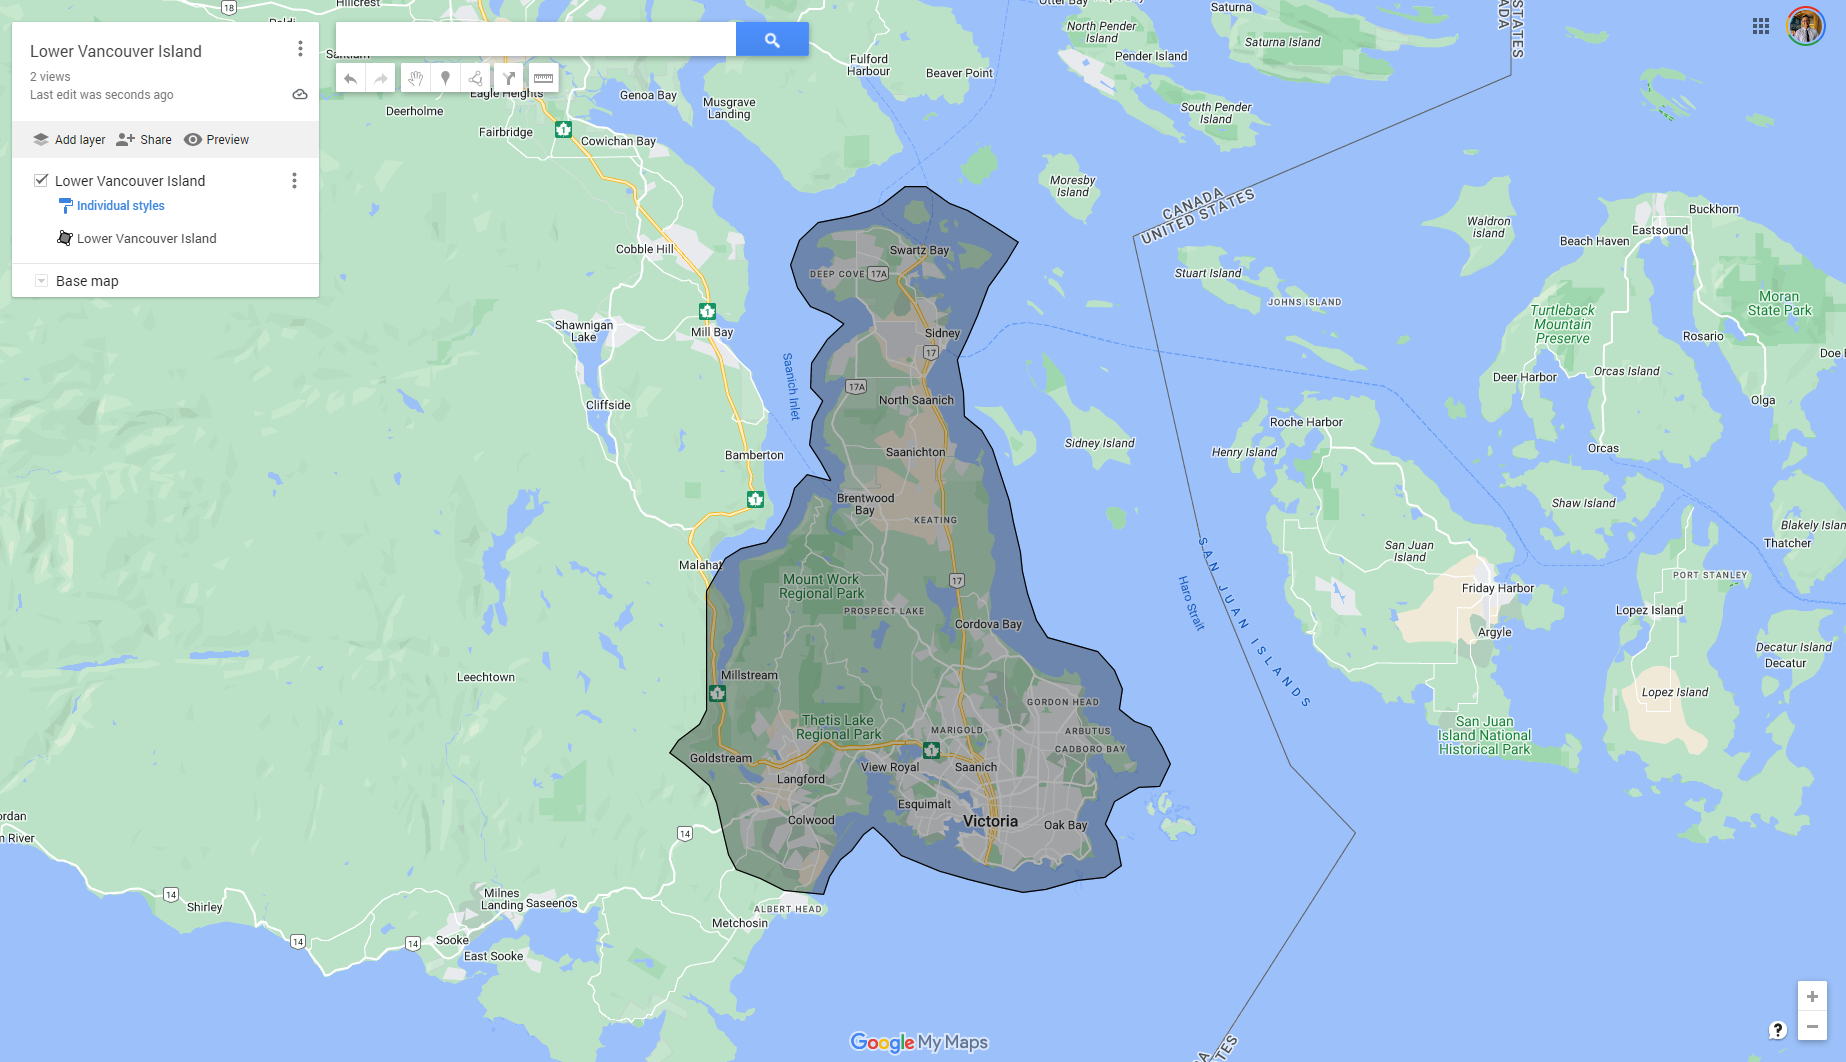

Using Google Earth Engine, download the Landsat data that covers the area of interest:

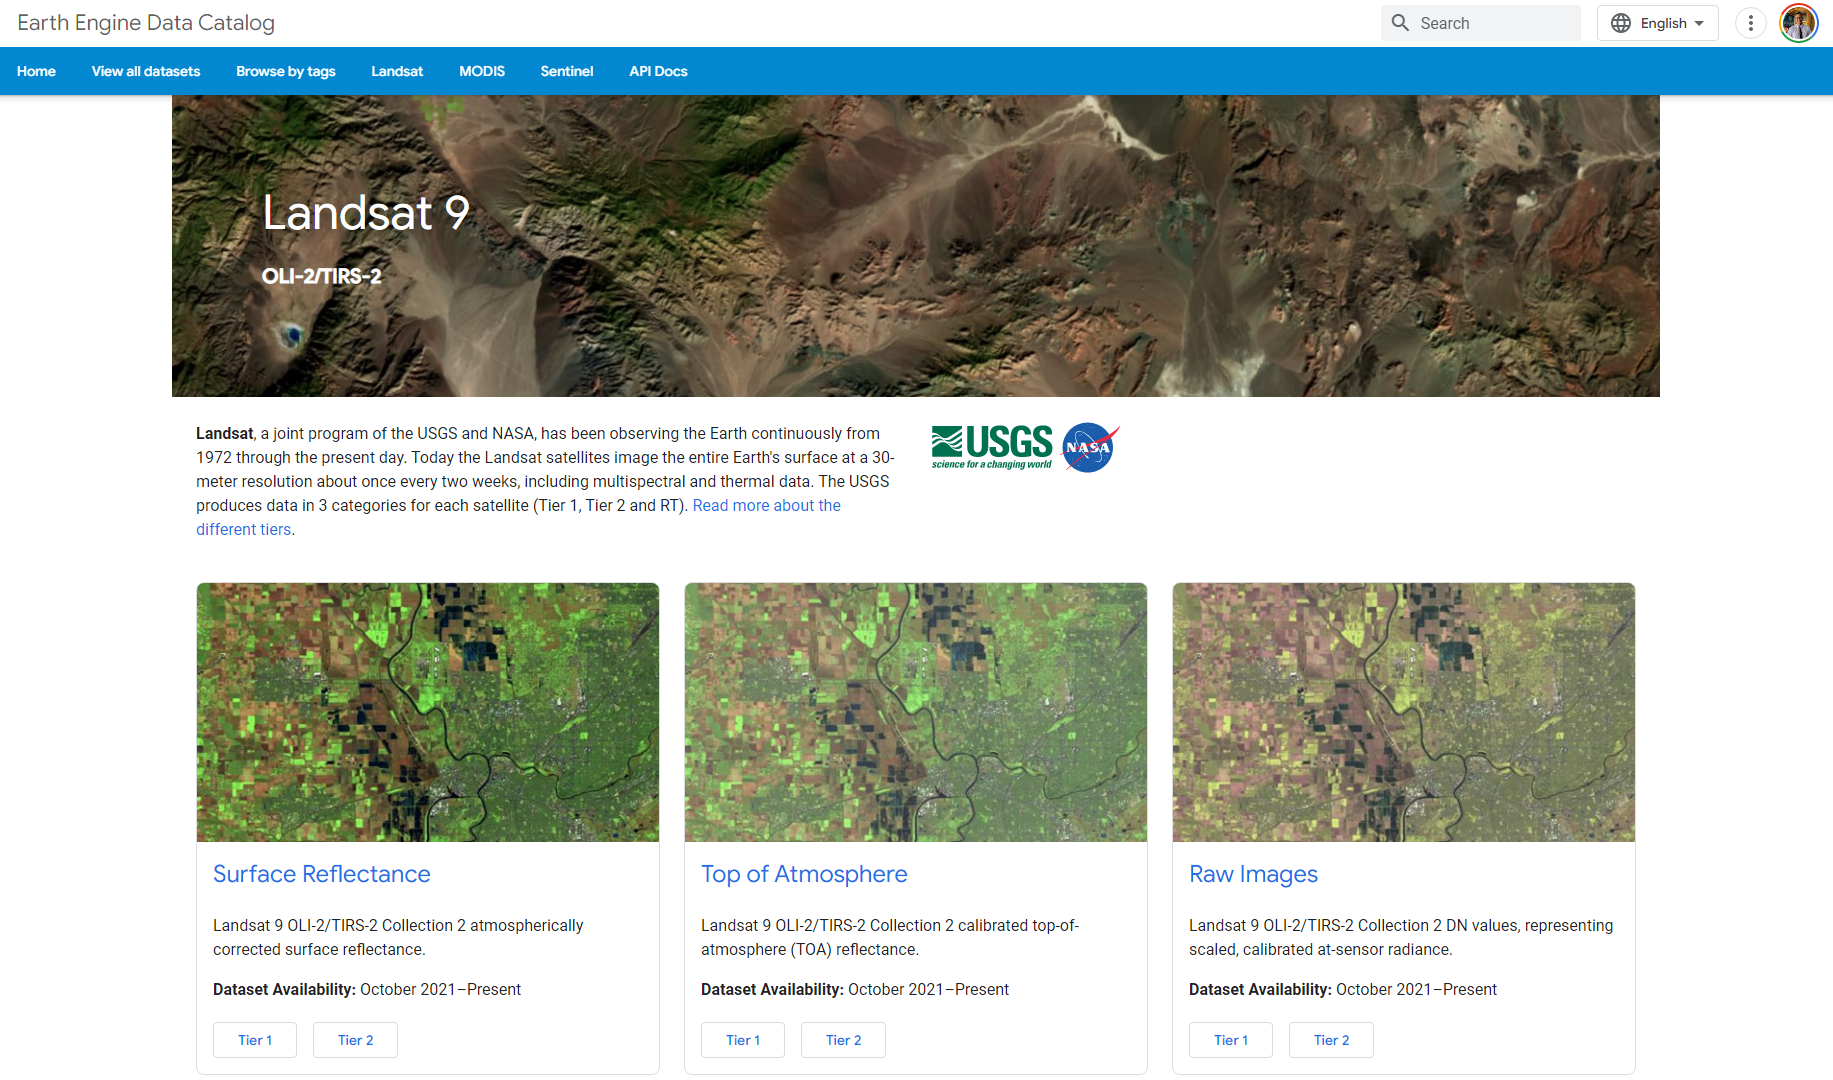

2023 Data
https://earthexplorer.usgs.gov/scene/metadata/full/5e83d14f2fc39685/LC80470262023075LGN00/

1995 Data
https://earthexplorer.usgs.gov/scene/metadata/full/5e83d1193824e4fc/LT50470261995062XXX00/

In [18]:
import subprocess

try:
    import geehydro
except ImportError:
    print('geehydro package not installed. Installing ...')
    subprocess.check_call(["python", '-m', 'pip', 'install', 'geehydro'])

In [19]:
import ee
import folium
import geehydro
import geopandas

In [20]:
try:
    ee.Initialize()
except Exception as e:
    ee.Authenticate()
    ee.Initialize()

In [21]:
Map = folium.Map(location=[40, -100], zoom_start=4)
Map.setOptions('HYBRID')

In [22]:
#Get a feature collection with Egypt
countries = ee.FeatureCollection('USDOS/LSIB_SIMPLE/2017')
Canada = countries.filter(ee.Filter.eq('country_na', 'Canada'))

# Load a pre-computed Landsat composite for input.
input = ee.Image('LANDSAT/LE7_TOA_1YEAR/2001')

aoi = ee.FeatureCollection([
  ee.Feature(ee.Geometry.Point(-123.9481117, 48.7245919)),
  ee.Feature(ee.Geometry.Point(-123.9439919, 48.2915186)),
  ee.Feature(ee.Geometry.Point(-123.2545998, 48.2896912)),
  ee.Feature(ee.Geometry.Point(-123.2583763, 48.7270832)),
  ee.Feature(ee.Geometry.Point(-123.9481117, 48.7245919))
]);

# Load a pre-computed Landsat composite for input.
input = ee.Image('LANDSAT/LE7_TOA_1YEAR/2001')

# Define a region in which to generate a sample of the input.
region = ee.Geometry.Rectangle(-123.25, 48.29, -123.95, 48.72)

# Display the sample region.
Map.setCenter(48.5, -123.57, 8)
Map.addLayer(ee.Image().paint(region, 0, 2), {}, 'region')

# Make the training dataset.
training = input.sample(**{
  'region': region,
  'scale': 30,
  'numPixels': 5000
})

# Instantiate the clusterer and train it.
clusterer = ee.Clusterer.wekaKMeans(15).train(training)

# Cluster the input using the trained clusterer.
result = input.cluster(clusterer)

# Display the clusters with random colors.
Map.addLayer(result.clip(Canada).randomVisualizer(), {}, 'clusters')


In [23]:
aoi

In [24]:
Map.setControlVisibility(layerControl=True, fullscreenControl=True, latLngPopup=True)
Map